In [1]:
from __future__ import print_function

#import random 

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#import library for visualization purpose
import matplotlib.pyplot as plt
###############Step-1###################
##### load and preprocess data   #######

#Step 1.1: load raw data
from PIL import Image
import os
import re
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
def get_data(path):
    classes = {"baby" : 0,"boy" : 1,"girl" : 2,"man" : 3,"woman" : 4}
    all_images_as_array=[]
    label=[]
    for filename in os.listdir(path):
        if re.match(r'.DS',filename):
            continue
        for imagefilename in os.listdir(path + filename):
            if re.match(r'.DS',imagefilename):
                continue
            label.append(classes[filename]);                    
            img=Image.open(path + filename + '/' + imagefilename)
            np_array = np.asarray(img)
            l,b,c = np_array.shape
            #np_array = np_array.reshape(l*b*c,)
            all_images_as_array.append(np_array)           
    return np.array(all_images_as_array), np.array(label)
path_to_train_set = 'cifar-100-data/train/'
path_to_test_set = 'cifar-100-data/test/'
X_train,y_train = get_data(path_to_train_set)
X_test, y_test = get_data(path_to_test_set)
print('X_train set shape: ',X_train.shape)
print('y_train set shape: ',y_train)
print('X_test set shape: ',X_test.shape)
print('y_test set shape: ',y_test.shape)


X_train set shape:  (2500, 32, 32, 3)
y_train set shape:  [3 3 3 ... 4 4 4]
X_test set shape:  (500, 32, 32, 3)
y_test set shape:  (500,)


In [2]:
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
y_train = np.reshape(y_train, (y_train.shape[0], -1))
y_test = np.reshape(y_test, (y_test.shape[0], -1))
print(X_train.shape, X_test.shape)
#knn=KNeighborsClassifier()
#knn=KNeighborsClassifier(n_neighbors=3)
knn=KNeighborsClassifier(n_neighbors=4,weights='distance',p=1,metric='minkowski')
knn=knn.fit(X_train,y_train)

(2500, 3072) (500, 3072)


/Users/dokiatul/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


In [3]:
pred=knn.predict(X_test)

In [4]:
precision = accuracy_score(pred, y_test) * 100

In [5]:
print(precision)

37.0


In [6]:
confusion_matrix(y_test,pred)

array([[56, 11, 15, 13,  5],
       [29, 34, 13, 18,  6],
       [29, 22, 21, 18, 10],
       [17, 17, 11, 47,  8],
       [29, 13,  7, 24, 27]])

In [7]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.35      0.56      0.43       100
           1       0.35      0.34      0.35       100
           2       0.31      0.21      0.25       100
           3       0.39      0.47      0.43       100
           4       0.48      0.27      0.35       100

    accuracy                           0.37       500
   macro avg       0.38      0.37      0.36       500
weighted avg       0.38      0.37      0.36       500



/Users/dokiatul/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/Users/dokiatul/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/Users/dokiatul/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/Users/dokiatul/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-ve

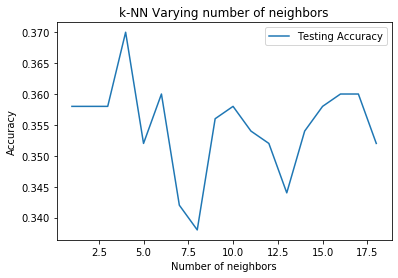

In [8]:
neighbors = np.arange(1,19)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k,weights='distance',p=1,metric='minkowski')
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    #train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)
    
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
#plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()